What is the relationship between the stroke population to diabetes, heart disease, and high blood pressure in respect to geographical area?
Five factors contribute to stroke.  
1.	Diabetes
2.	Heart Disease
3.	High Blood Pressure
4.	High Cholesterol
5.	Obesity


In [ ]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
#import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 
import seaborn as sns 
%matplotlib inline

df1 = pd.read_csv("Daignosed_Ob_df01.csv" )
df2 = pd.read_csv("Diagnosed_Db_df01.csv" )
df3 = pd.read_csv("Diagnosed_HBp_df01.csv" )
df4 = pd.read_csv("Diagnosed_Hc_df01.csv" )
df5 = pd.read_csv("Diagnosed_Hd_df01.csv" )
df6 = pd.read_csv("Diagnosed_STr_df01.csv" )


%pip install scikit-learn  --upgrade --force
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split


In [ ]:
df6 = df6.drop(columns = ['StkCity','StkLowFid', 'StkHighFid', 'StkMeanByUS', 'StkRelByUS',
       'Stk_Lat', 'Stk_Log'])
df6 = df6.rename(columns={'StkMean':'Target'})

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
df.head().T

In [ ]:
#df6.info
#df6.head()
#df6
#df6.columns
#df6.describe()
#df6.to_numeric(df6['StkMean'])
#df6.isna().sum()

In [ ]:
#https://www.youtube.com/watch?v=wzN1UyfRSWI&t=444s
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)



In [ ]:
#print("Index:  ", df.index)
#print("Columns:", df.columns)
#print("Size:   ", df.size)
#print("Shape:  ", df.shape)
#df.isna().sum()
#df.isna().sum()
#df.head().T
#df.head()
#df.info()
#df.shape 
#df.describe().T # run a quick stat 
df.columns

In [ ]:
df.info()

In [ ]:
#Dropping all the (str) from the model
df = df.drop(columns = ['ObCity', 'Ob_Lat', 'Ob_Log', 'DbCity','Db_Lat', 'Db_Log', 'HBp_City', 'HBp_Lat',
'HBp_Logit', 'Hc_City','Hd_City', 'Hc_Lat', 'Hc_Log', 'Hd_City','Hd_Lat', 'Hd_Log' ])

In [54]:
df["Target"].describe()

count    28004.000000
mean         3.116091
std          1.532435
min          0.000000
25%          2.200000
50%          2.800000
75%          3.700000
max         19.500000
Name: Target, dtype: float64

In [ ]:
df.describe()


<Axes: title={'center': 'Distribution of all 5 diagnoses by the states and its cities'}>

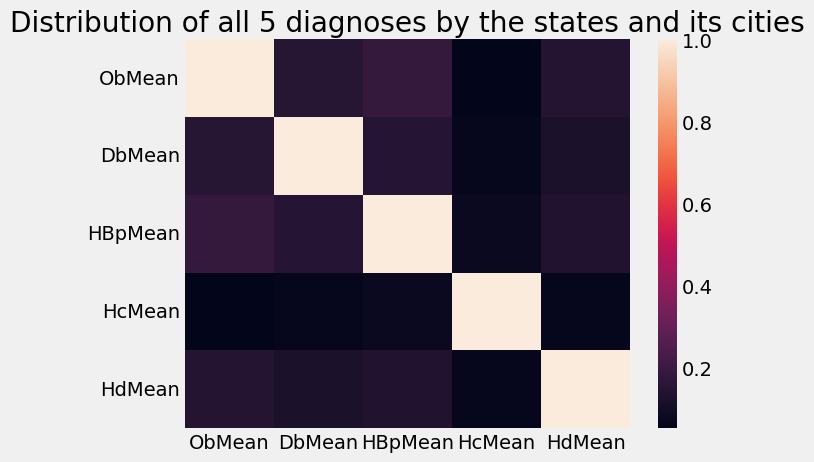

In [49]:
#Heatmap
# Summary: Distribution of all the factors from cities in the US. 
plt.title('Distribution of all 5 diagnoses by the states and its cities')
df_corr = df[['ObMean',  'DbMean', 'HBpMean','HcMean', 'HdMean']].corr()
sns.heatmap(df_corr)


In [ ]:
## Dividing the dataset into independent and dependent features.
X=df.iloc[:, :-1] # Independent features.
y=df.iloc[:, -1]  # dependent features.

In [ ]:
# int/float, after dropping
X

In [ ]:
# laod types of model to use.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#80% training - it chooses ramdom samples.
len(X_train)

In [ ]:
X_train

In [ ]:
#20% testing
len(X_test)

In [ ]:
model = LinearRegression ()
model.fit(X_train,y_train)


In [ ]:
model.predict(X_test)

In [ ]:
#prdict = model.predict(X)

In [ ]:
y_test

In [ ]:
# Checking the accuracy 
# compare the X_test to y_test 
model.score(X_test,y_test)

In [ ]:
#model.predict(X_test)

In [ ]:

model.predict(X_test)

model.score(X_test,y_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error


In [ ]:
y_pred = model.predict(X_test)

In [51]:
print("r2: ".format(r2_score(y_pred,y_test)))

r2: 


In [50]:
print("mae: ".format(mean_absolute_error(y_pred,y_test)))

mae: 


In [ ]:
r2_score(y_pred,y_test)

In [52]:
mean_absolute_error(y_pred,y_test)

1.0726515362846323

In [ ]:
model.score(y_pred,y_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(y_pred,y_test)